# SVM Plasticity Decoding

### Notebook to decode synaptic plasticity based on activity features using an SVM

In [1]:
# Import packages
import os
import numpy as np
from Lab_Analyses.Spine_Analysis_v2 import spine_utilities as s_utils
from Lab_Analyses.Spine_Analysis_v2.spine_activity_dataclass import Grouped_Spine_Activity_Data
from Lab_Analyses.Spine_Analysis_v2.local_coactivity_dataclass import Grouped_Local_Coactivity_Data
from Lab_Analyses.Spine_Analysis_v2.dendritic_coactivity_dataclass import Grouped_Dendritic_Coactivity_Data
from Lab_Analyses.Spine_Analysis_v2.ML_plasticity_model import ML_Plasticity_Model, organize_input_data

## Apical Model

In [2]:
# Load dataset
# Mouse ids
id_1 = "JW082"
id_2 = "JW083" 
id_3 = "JW090"
id_4 = "JW092"
#id_5 = "JW126" # Not using
id_6 = "JW129" 
id_7 = "JW130" # Should I use? Nathan suspects layer 5?
id_8 = "JW153"
id_9 = "JW150"
id_10 = "JW168"
id_11 = "JW202"
#id_12 = "JW241"
#id_13 = "JW242"


apical_mouse_list = [id_1, id_2, id_3, id_4, id_6, id_7, id_8, id_9, id_10, id_11]

# Spine activity data
## Early
apical_activity_data = s_utils.batch_load_individual_analyzed_datasets(
    type="Activity",
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mice_list=apical_mouse_list,
    fov_type="apical",
    period=None,
    partner=None,
)
apical_activity_data = Grouped_Spine_Activity_Data(apical_activity_data)
# Local Coactivity data
## Early
apical_coactivity_data = s_utils.batch_load_individual_analyzed_datasets(
    type="Local",
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mice_list=apical_mouse_list,
    fov_type="apical",
    period=None,
    partner=None,
)
apical_coactivity_data = Grouped_Local_Coactivity_Data(apical_coactivity_data)
# Global_Coactivity_Data
apical_global_data = s_utils.batch_load_individual_analyzed_datasets(
    type="Global",
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mice_list=apical_mouse_list,
    fov_type="apical",
    period=None,
    partner=None,
)
apical_global_data = Grouped_Dendritic_Coactivity_Data(apical_global_data)

In [3]:
# Organize the data for the model
spine_features = ["spine_volumes", "spine_activity_rate"]
spine_features = []
local_features = [
    "avg_local_coactivity_rate", "near_vs_dist_coactivity", "avg_nearby_spine_rate", "near_vs_dist_activity_rate",
    "avg_nearby_coactivity_rate", "near_vs_dist_nearby_coactivity_rate",
]
#local_features = []
global_features = [
    "all_dendrite_coactivity_rate", "fraction_conj_events", "all_relative_onsets"
]
#global_features = []



x_values, y_values, class_codes = organize_input_data(
    spine_data=apical_activity_data,
    local_data=apical_coactivity_data,
    global_data=apical_global_data,
    spine_features=spine_features,
    local_features=local_features,
    global_features=global_features,
    exclude="Shaft Spine",
    threshold=(0.25, 0.5),
)

[3 1 3 1 3 2 3 1 3 3 3 2 3 2 2 2 3 3 2 2 3 1 1 1 3 1 2 3 1 1 3 3 3 3 3 3 2
 2 3 3 3 3 3 3 1 3 1 3 3 3 3 2 3 3 3 3 2 3 3 3 3 3 2 2 2 3 2 3 3 3 2 3 2 3
 3 3 2 3 3 3 3 2 3 2 2 3 1 3 1 3 1 3 1 3 1 3 2 2 3 3 1 2 3 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 1 1 3 3 1 2 2 3 3 3 3 2 3 3 3 3 1 1 3 3 2 2
 2 2 3 3 2 1 1 2 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 2 2 2 1 1 3 3 3 3 2 2 3 1 2
 2 2 3 2 3 3 1 3 3 3 2 2 3 2 3 1 1 2 3 2 2 3 1 2 2 3 3 2 3 2 3 1 3 3 3 3 3
 3 3 3 2 3 1 2 3 3 2 1 2 1 3 3 3 1 2 3 1 3 2 3 1 1 3 3 2 1 1 2 2 3 2 3 3 3
 3 2 3 3 3 3 3 1 2 1 1 3 1 1 1 2 1 2 3 3 3 3 1 3 3 2 3 2 1 3 1 3 3 3 2 2 3
 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1 3 3 1 3 3 3 3 3 3 3 1 3 3 3 3 3
 3 2 3 2 2 3 3 3 3 3 3 3 1 3 1 2 2 3 2 3 3 3 3 1 3 3 3 3 1 1 3 2 3 3 3 3 2
 3 3 3 3 2]


In [ ]:
x_values["s_spine_volumes"].shape

In [ ]:
x_values.keys()

In [ ]:
np.unique(y_values, return_counts=True)

In [4]:
# Initialize the model
apical_model = ML_Plasticity_Model(model_name="Apical_Model")

78


In [5]:
# Train the model
apical_model.train_full_model(x_values=x_values, y_values=y_values, classes=class_codes, score_method="f1_macro", 
                              cv_num=5, model_type="Logistic", C=100, resample="under")

PERFORMING SHUFFLE 0
PERFORMING SHUFFLE 1
PERFORMING SHUFFLE 2
PERFORMING SHUFFLE 3
PERFORMING SHUFFLE 4


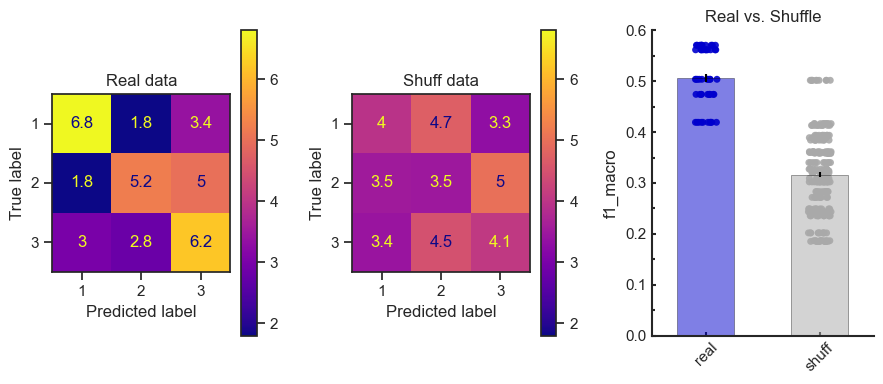

In [6]:
apical_model.plot_model_performance(iterations=5, figsize=(9,4), save=True)

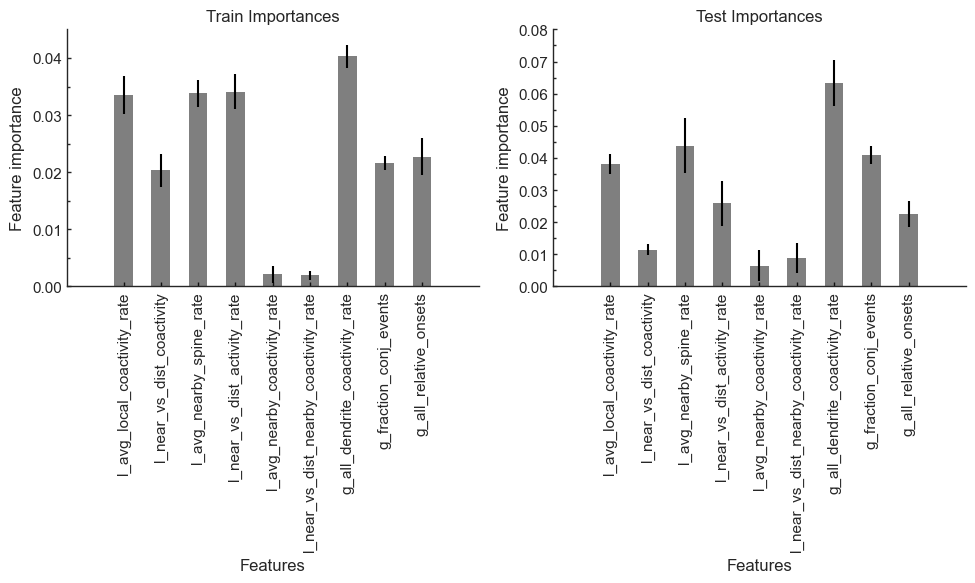

In [7]:
apical_model.plot_feature_weights(figsize=(10,6))

In [ ]:
apical_model.shuff_model_test_score

In [ ]:
np.mean(apical_model.full_model_test_score)

In [ ]:
apical_model.X_corrected.shape